In [1]:
# Import all necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import os
import csv
import numpy as np

# Create the CSV Paths
mouse_metadata_path = os.path.join("Data", "Mouse_metadata.csv")
study_results_path = os.path.join("Data", "Study_results.csv")

# Read the CSVs
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine CSVs into a single dataset and display first 5
combined_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Find and drop any duplicate Mouse IDs in the CSV
combined_study_df_cleaned = combined_study_df.drop_duplicates(keep="first")
combined_study_df_cleaned = combined_study_df_cleaned.reset_index()

#After resetting the index, drop the new "index" column that was created and display the first 10
combined_study_df_cleaned = combined_study_df_cleaned.drop("index", axis=1)
combined_study_df_cleaned.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Check the total number of unique mice based on "Mouse ID"
total_num_mice = len(combined_study_df_cleaned["Mouse ID"].unique())
total_num_mice

249

In [4]:
# Get the duplicate by Mouse ID that shows up in Mouse ID and Timepoint. 
mouse_duplicates_single = combined_study_df.loc[combined_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicates_single

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID. 
mouse_duplicate_g989 = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
mouse_duplicate_g989 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Drop all data for the duplicate Mouse ID and update the cleaned DataFrame
# Note: We're dropping g989 completely given the various data conflicts at the same timepoints, making the data unreliable
combined_study_df_cleaned = combined_study_df_cleaned.set_index("Mouse ID").drop(index="g989")
combined_study_df_cleaned = combined_study_df_cleaned.reset_index()
combined_study_df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(combined_study_df_cleaned["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [8]:
# Create summary statistics table (mean, median, variance, standard deviation, and SEM) 
# for the tumor volume for each of the drug regimens
drug_regimen = combined_study_df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_tumor_vol = drug_regimen.mean()
median_tumor_vol = drug_regimen.median()
var_tumor_vol = drug_regimen.var()
std_tumor_vol = drug_regimen.std()
sem_tumor_vol = drug_regimen.sem()

drug_regimen_df = pd.DataFrame({"Mean Tumor Vol": mean_tumor_vol, 
                                "Median Tumor Vol": median_tumor_vol, 
                                "Variance of Tumor": var_tumor_vol, 
                                "Standard Dev of Tumor": std_tumor_vol, 
                                "Standard Error of Mean": sem_tumor_vol})
drug_regimen_df


,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor,Standard Dev of Tumor,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Single Line of code: Create summary statistics table (mean, median, variance, standard deviation, and SEM) 
# for the tumor volume for each of the drug regimens

sing_drug_reg = combined_study_df_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
sing_drug_reg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

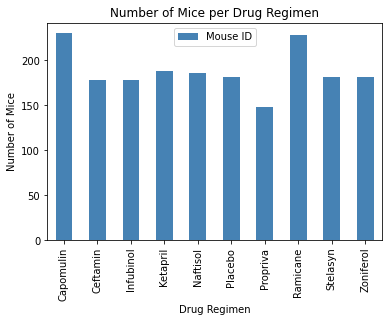

In [63]:
# Pandas Bar Chart

# Find total number of unique mice tested on each drug regimen
mice_by_drug = combined_study_df_cleaned.groupby("Drug Regimen")["Mouse ID"].count()

# Create the Pandas Bar Chart and set the color
mice_by_drug_bar = mice_by_drug.plot(kind="bar", color="steelblue", legend=True)

# Set the y-label and the title
mice_by_drug_bar.set_ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

# Display
plt.show()

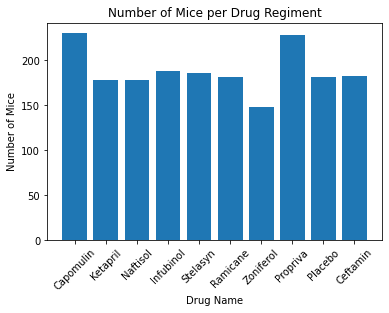

In [64]:
# Pyplot Bar Chart

# Locate the drug names and pull the unique ones, assign values to variable
drug_name = combined_study_df_cleaned["Drug Regimen"].unique()

# Set the range of the x-axis
drug_x_axis = np.arange(len(drug_name))

# Create list comprehension for x-ticks
drug_xticks = [name for name in drug_x_axis]

# Create the bar chart, but make the rotation 45 degrees instead of vertical
plt.xticks(drug_xticks, drug_name, rotation=45)
plt.bar(drug_x_axis, mice_by_drug)

# Set the titles and labels
plt.title("Number of Mice per Drug Regiment")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice")

#Display
plt.show()

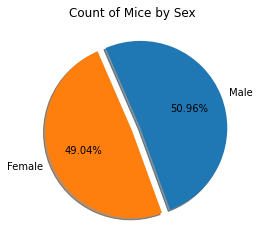

In [65]:
# Pandas Pie

# Get the total count of mice by sex
mice = combined_study_df_cleaned["Sex"].value_counts()

# Set the "explode" size for the values
explode = [0.1, 0]

#Generate the pie chart
mice.plot(kind="pie", explode=explode, autopct="%5.2f%%", shadow=True, startangle=290, title="Count of Mice by Sex", label="")

# Display
plt.show()

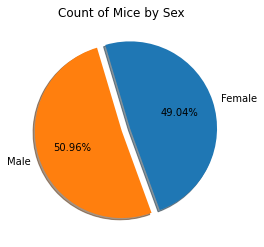

In [97]:
# Pyplot Pie Chart

# Find the count per sex
female_count = combined_study_df_cleaned.loc[combined_study_df_cleaned["Sex"] == "Female"].count()["Mouse ID"]
male_count = combined_study_df_cleaned.loc[combined_study_df_cleaned["Sex"] == "Male"].count()["Mouse ID"]

# Create chart and set title
plt.pie([female_count, male_count], explode=explode, autopct="%1.2f%%", labels=["Female", "Male"], shadow=True, startangle=290)
plt.title("Count of Mice by Sex")

#Display
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Boxplot

# set list of drugs to look at
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the values of the last Mouse ID for each point of interest (Tumor Volume, Timepoint, and Drug Regimen)
tumor_last = combined_study_df_cleaned.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
timepoint_last = combined_study_df_cleaned.groupby("Mouse ID").last()["Timepoint"]
drug_regimen_last = combined_study_df_cleaned.groupby("Mouse ID").last()["Drug Regimen"]

# Create a dictionary to hold the key/values 
drug_reg_dictionary = {"Timepoint": timepoint_last, 
                       "Tumor Volume (mm3)": tumor_last, 
                       "Drug Regimen": drug_regimen_last}

# Create DataFrame to display dictionary data
quartiles_df = pd.DataFrame(drug_reg_dictionary)

# Only the data for drugs in the drug_names list
quartiles_df = quartiles_df.loc[quartiles_df["Drug Regimen"].isin(drug_names)]
quartiles_df

,Timepoint,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,
a203,45,67.973419,Infubinol
a251,45,65.525743,Infubinol
a275,45,62.999356,Ceftamin
a411,45,38.407618,Ramicane
a444,45,43.047543,Ramicane
...,...,...,...
y769,45,68.594745,Ceftamin
y793,45,31.896238,Capomulin
y865,45,64.729837,Ceftamin


Text(0.5, 1.0, '')

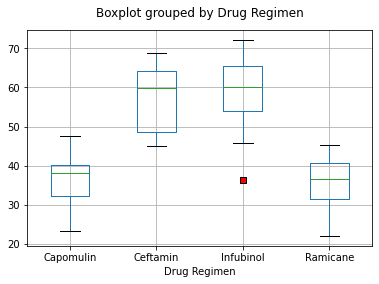

In [99]:
# Create the boxplot and set the outlier display properties
red_square = dict(markerfacecolor='r', marker='s')
quartiles_df.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)", flierprops=red_square).set_title("")

In [100]:
# Create loop to go through each drug and pull values (Lower Quartile, Upper Quartile, Inter-Quartile Range, etc.)
for drug in drug_names:
    
    # Create new dataframe, and look only at the "drug regimen" if it's equal to the variable
    new_drug_df = quartiles_df.loc[quartiles_df["Drug Regimen"] == drug]
    
    # Get the tumor volume for that variable
    tumor_vol_new = new_drug_df["Tumor Volume (mm3)"]
    
    # Set the quartiles
    quartiles = tumor_vol_new.quantile([.25, .5, .75])
    
    # Set variables for upper and lower quartiles to find the inter-quartile range
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_q_range = upper_quartile - lower_quartile
    
    # find the lower-bound and upper-bound to determine outliers
    lower_bound = lower_quartile - (1.5 * inter_q_range)
    upper_bound = upper_quartile + (1.5 * inter_q_range)
    outliers = tumor_vol_new.loc[(tumor_vol_new > upper_bound) | (tumor_vol_new < lower_bound)].unique()
    
    # Print the data for the user
    print(f"{drug} \n"
          f"    Lower Quartile: {lower_quartile}\n"
          f"    Upper-quartile: {upper_quartile}\n"
          f"    Inter-Quartile Range: {inter_q_range}\n"
          f"    Lower-Bound: {lower_bound}\n"
          f"    Upper-Bound: {upper_bound}\n"
          f"    Outlier(s): {outliers}")

Capomulin 
    Lower Quartile: 32.37735684
    Upper-quartile: 40.1592203
    Inter-Quartile Range: 7.781863460000004
    Lower-Bound: 20.70456164999999
    Upper-Bound: 51.83201549
    Outlier(s): []
Ramicane 
    Lower Quartile: 31.56046955
    Upper-quartile: 40.65900627
    Inter-Quartile Range: 9.098536719999998
    Lower-Bound: 17.912664470000003
    Upper-Bound: 54.30681135
    Outlier(s): []
Infubinol 
    Lower Quartile: 54.04860769
    Upper-quartile: 65.52574285
    Inter-Quartile Range: 11.477135160000003
    Lower-Bound: 36.83290494999999
    Upper-Bound: 82.74144559000001
    Outlier(s): [36.3213458]
Ceftamin 
    Lower Quartile: 48.72207785
    Upper-quartile: 64.29983003
    Inter-Quartile Range: 15.577752179999997
    Lower-Bound: 25.355449580000002
    Upper-Bound: 87.66645829999999
    Outlier(s): []


## Line and Scatter Plots

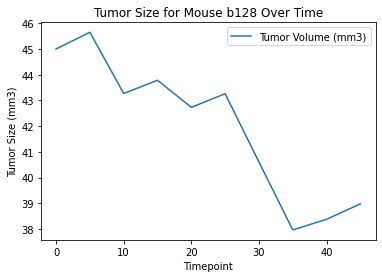

In [101]:
# Capomulin Example Line - Mouse ID: b128

# Look at just b128 for Capomuline, grab the Tumor Volume and the Timepoint values
capomulin_example = combined_study_df_cleaned.loc[(combined_study_df_cleaned["Drug Regimen"] == "Capomulin") & (combined_study_df_cleaned["Mouse ID"]=="b128")][["Tumor Volume (mm3)", "Timepoint"]]

# Set the index to "timepoint" so it becomes the x-axis
capomulin_example = capomulin_example.set_index("Timepoint")

# Create the chart and label the x, y, and title
capomulin_graph = capomulin_example.plot()
capomulin_graph.set_xlabel("Timepoint")
capomulin_graph.set_ylabel("Tumor Size (mm3)")
capomulin_graph.set_title("Tumor Size for Mouse b128 Over Time")

# Display cleanly
plt.show()

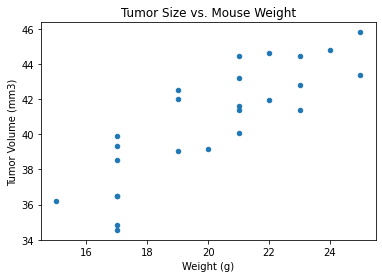

In [130]:
# Capomulin Scatter Plot

# Narrow down to "Capomulin" for drug regimen, and grab the Mouse ID, Tumor Vol, and the Weight
tumor_vs_weight = combined_study_df_cleaned.loc[combined_study_df_cleaned["Drug Regimen"] == "Capomulin"][["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]

# Group by Mouse ID and find the mean of tumor volume and weight
tumor_vs_weight_mean = tumor_vs_weight.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()

# Create the scatter plot, Weight on the x-axis and Tumor Volume on the y-axis
tumor_vs_weight_mean.plot("Weight (g)","Tumor Volume (mm3)", kind="scatter")
plt.title("Tumor Size vs. Mouse Weight")

# Display cleanly
plt.show()

## Correlation and Regression

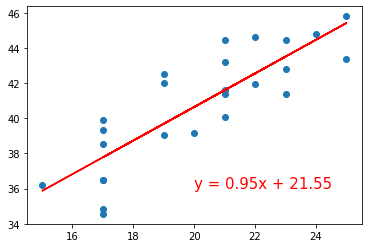

The correlation is 0.8419363424694717
And the r-squared is 0.7088568047708715


In [103]:
# Capomulin Correlation and Regression

# Use tumor_vs_weight_last to find tumor size and weight values
tumor_size = tumor_vs_weight_last.iloc[:, 0]
mouse_weight = tumor_vs_weight_last.iloc[:, 1]

# calculate the correlation and r-squared
correlation = sts.pearsonr(mouse_weight, tumor_size)
r_squared = (correlation[0] ** 2)

# unpack tuple for line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_size)

# calculate the regression values
regress_values = mouse_weight * slope + intercept

# write the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create the scatter plot with the line regression and annotation
plt.scatter(mouse_weight,tumor_size)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()

# print correlation and r-squared
print(f"The correlation is {correlation[0]}")
print(f"And the r-squared is {r_squared}")